In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [120]:
phase_scan = pd.read_csv("dc_220224.csv")
heating_voltage = phase_scan["Heating"]
detector_1 = phase_scan["Detector 1"]
detector_2 = phase_scan["Detector 2"]
detector_3 = phase_scan["Detector 3"]

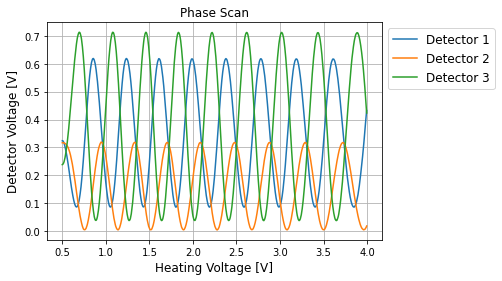

In [121]:
plt.plot(heating_voltage, detector_1, label="Detector 1")
plt.plot(heating_voltage, detector_2, label="Detector 2")
plt.plot(heating_voltage, detector_3, label="Detector 3")
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Detector Voltage [V]", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.title("Phase Scan", fontsize=12)
plt.show()

In [122]:
def scale_data(data):
    return 2 * (data - min(data)) / (max(data) - min(data)) - 1

In [123]:
dc_scaled = [scale_data(detector_1), scale_data(detector_2), scale_data(detector_3)]
I_max = [max(detector_1), max(detector_2), max(detector_3)]
I_min = [min(detector_1), min(detector_2), min(detector_3)]

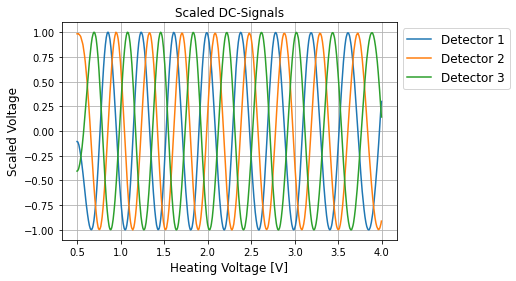

In [124]:
plt.plot(heating_voltage, dc_scaled[0], label="Detector 1")
plt.plot(heating_voltage, dc_scaled[1], label="Detector 2")
plt.plot(heating_voltage, dc_scaled[2], label="Detector 3")
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Scaled Voltage", fontsize=12)
plt.title("Scaled DC-Signals", fontsize=12)
plt.show()

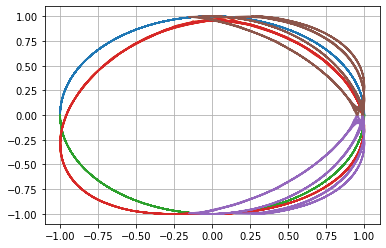

In [125]:
X = []
Y = []
theta= [0, 1.4178329530845706, 3.694062670007489]

for i in range(3):
    X.append(dc_scaled[i] * np.cos(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    X.append(dc_scaled[i] * np.cos(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))

for i in range(3):
    for j in range(3):
        if i != j:
            plt.plot(X[i], Y[j])

plt.grid(True)
plt.show()

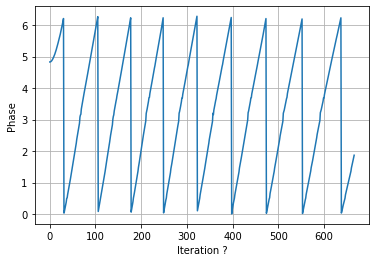

In [126]:
x = []
y = []
for i in range(len(X[0])):
    current_error_x = 6
    current_error_y = 6
    indices_x = None
    indices_y = None
    for j in range(6):
        for k in range(j + 1, 6):
            for l in range(k + 1, 6):
                error_x = abs(X[j][i] - X[k][i]) + abs(X[j][i] - X[l][i]) + abs(X[l][i] - X[k][i])
                error_y = abs(Y[j][i] - Y[k][i]) + abs(Y[j][i] - Y[l][i]) + abs(Y[l][i] - Y[k][i])
                if current_error_x > error_x:
                    indices_x = (j, k, l)
                    current_error_x = error_x
                if current_error_y > error_y:
                    indices_y = (j, k, l)
                    current_error_y = error_y
    x.append(np.mean([X[indices_x[0]][i], X[indices_x[1]][i], X[indices_x[2]][i]]))
    y.append(np.mean([Y[indices_y[0]][i], Y[indices_y[1]][i], Y[indices_y[2]][i]])) 

#plt.plot(x, y)
phi = np.arctan2(y, x)
plt.plot(range(len(phi)), phi + np.pi)
plt.xlabel("Iteration ?")
plt.ylabel("Phase")
plt.grid(True)
plt.show()

In [127]:
theta = [np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[1]),
         np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[1]),
         -np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[1]),
         -np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[1])]

theta_2 = [np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[2]),
          -np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[2]),
          np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[2]),
          -np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[2]),]

for i in range(len(theta)):
    theta[i] =  [theta[i][j] if theta[i][j] >= 0 else theta[i][j] + 2 * np.pi for j in range(len(theta[i]))]

for i in range(len(theta)):
    theta_2[i] = [theta_2[i][j] if theta_2[i][j] >= 0 else theta_2[i][j] + 2 * np.pi for j in range(len(theta_2[i]))]

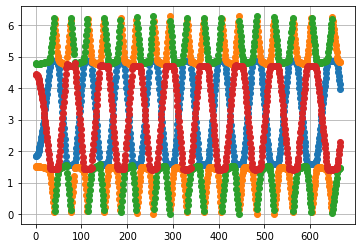

In [128]:
for i in range(len(theta)):
    plt.plot(range(len(theta[i])), theta[i], "o")

plt.grid()
plt.show()

1.4178329530845706


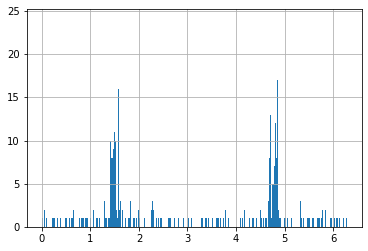

In [129]:
thetas = []

for i in range(len(theta[1])):
    for j in range(4):
        thetas.append(theta[j][i])

thetas.sort()

n, bins, _ = plt.hist(thetas, bins=int(len(thetas)))

mode_index = n.argmax()
print(bins[mode_index])

plt.grid()
#plt.savefig("plot.pdf")

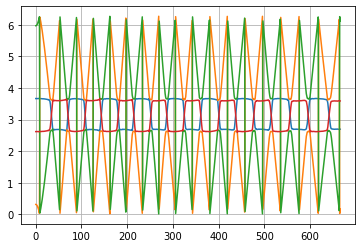

In [130]:
for i in range(len(theta)):
    plt.plot(range(len(theta_2[i])), theta_2[i])

plt.grid()
plt.show()

3.694062670007489


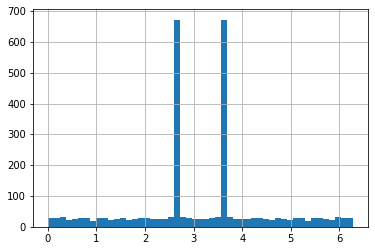

In [131]:
thetas = []

for i in range(len(theta[1])):
    for j in range(4):
        thetas.append(theta_2[j][i])

thetas.sort()
n, bins, _ = plt.hist(thetas, bins=int(np.sqrt(len(thetas))))

mode_index = n.argmax()
print(2 * np.pi - bins[mode_index])

#plt.plot(np.linspace(0, len(theta[0]), len(thetas)), thetas)
plt.grid()
plt.show()

In [132]:
signals = pd.read_csv("data.csv")
DC = [signals["DC1"], signals["DC2"], signals["DC3"]]
AC_X = [signals["X1"], signals["X2"], signals["X3"]]
AC_Y = [signals["Y1"], signals["Y2"], signals["Y3"]]

In [133]:
phi = []
system_phase = []
dc_scaled = []
for i in range(3):
    system_phase.append(np.mean(np.arctan2(AC_Y[i][950:1200], AC_X[i][950:1100])))
    dc_scaled.append(2 * (DC[i] - I_min[i]) / (I_max[i] - I_min[i]) - 1)
print(system_phase)
phases = []

x = []
y = []
X = []
Y = []
theta= [0, 1.4178329530845706, 3.694062670007489]

for i in range(3):
    X.append(dc_scaled[i] * np.cos(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    X.append(dc_scaled[i] * np.cos(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))
for i in range(len(X[0])):
    current_error_x = 6
    current_error_y = 6
    indices_x = None
    indices_y = None
    for j in range(6):
        for k in range(j + 1, 6):
            for l in range(k + 1, 6):
                error_x = abs(X[j][i] - X[k][i]) + abs(X[j][i] - X[l][i]) + abs(X[l][i] - X[k][i])
                error_y = abs(Y[j][i] - Y[k][i]) + abs(Y[j][i] - Y[l][i]) + abs(Y[l][i] - Y[k][i])
                if current_error_x > error_x:
                    indices_x = (j, k, l)
                    current_error_x = error_x
                if current_error_y > error_y:
                    indices_y = (j, k, l)
                    current_error_y = error_y
    x.append(np.mean([X[indices_x[0]][i], X[indices_x[1]][i], X[indices_x[2]][i]]))
    y.append(np.mean([Y[indices_y[0]][i], Y[indices_y[1]][i], Y[indices_y[2]][i]])) 

[1.8923001365794618, -1.298382436392517, -1.1586701341788703]


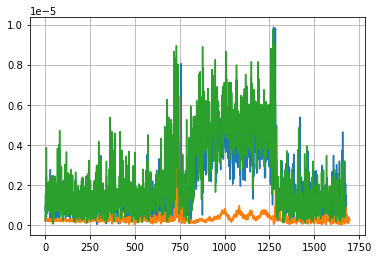

In [134]:
phi = np.arctan2(y, x)
pti = []
R_values = [[], [], []]
phase_values = [[], [], []]
for j in range(len(AC_X[0])):
    pti_signal = 0
    weight = 0
    for i in range(3):
        R = np.sqrt(AC_X[i][j] ** 2 + AC_Y[i][j] ** 2)
        if R < 1e-5:
            R_values[i].append(R)
        sys = np.arctan2(AC_Y[i][j], AC_X[i][j])
        phase_values[i].append(sys)
        dms = R * np.cos(sys - system_phase[i])
        pti_signal += dms * abs(np.sin(phi[j] - theta[i])) / np.sin(phi[j] - theta[i])
        weight += (I_max[i] - I_min[i]) / 2 * abs(np.sin(phi[j]) - theta[i])
    pti.append(-pti_signal / weight)
for i in range(3):
    plt.plot(range(len(R_values[i])), R_values[i])
plt.grid()
plt.show()

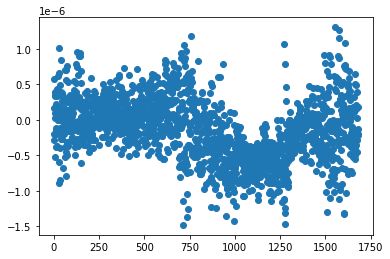

In [135]:
pti_small = []
for element in pti:
    if abs(element) < 1.5e-6 :
        pti_small.append(element)
plt.plot(range(len(pti_small)), pti_small, "o")
plt.show()

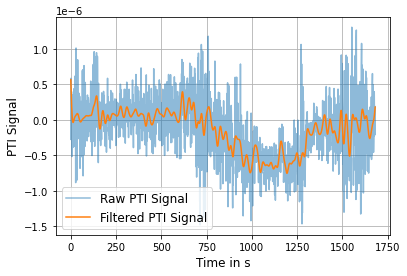

In [162]:
from scipy import signal as sig
def low_pass(data, fs, order, fc):
    nyq = 0.5 * fs  # Calculate the Nyquist frequency.
    cut = fc / nyq  # Calculate the cutoff frequency (-3 dB).
    lp_b, lp_a = sig.butter(order, cut, btype='lowpass')  # Design and apply the low-pass filter.
    lp_data = list(sig.filtfilt(lp_b, lp_a, data))  # Apply forward-backward filter with linear phase.
    return lp_data

pti = low_pass(pti_small, fs=1, order=4, fc=4e-2)
plt.plot(range(len(pti_small)), pti_small, "-", alpha=0.5, label="Raw PTI Signal")
plt.plot(range(len(pti)), pti, "-", label="Filtered PTI Signal")
plt.xlabel("Time in s", fontsize=12)
plt.ylabel("PTI Signal", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.save_fig("Plot.pdf")